# Visualize deflection maps and fill kappa_d tables

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
mpl.rcParams['figure.dpi'] = 150
from fancy.plotting import AllSkyMap

In [2]:
detectors = []
gmfs = []
ptypes = []

for f in os.listdir('output'):
    d, m ,p = f.split('_')[1:4]
    detectors.append(d)
    gmfs.append(m)
    ptypes.append(p)

detectors = list(set(detectors))
gmfs = list(set(gmfs))
ptypes = list(set(ptypes))

print('Simulations available for:')
print(detectors, gmfs, ptypes)
file_templ = 'output/defl_{0}_{1}_{2}_19990308.pkl'


Simulations available for:
['TA2015'] ['JF12'] ['p']


In [3]:
plt.style.use("minimalist")

In [4]:

# for dt in detectors:
#     # if dt != "TA2015":
#     #     continue
#     for mf in gmfs:
#         fig, axes = plt.subplots(
#             3, 2, figsize=(12, 10), subplot_kw={"projection": "mollweide"}
#         )
#         for ip, pt in enumerate(["p", "He", "C", "N", "Si", "Fe"]):
#             ax = axes.flatten()[ip]

#             (
#                 kappa_gmf,
#                 omega_gal,
#                 omega_rand,
#                 omega_true,
#                 kappa_gmf_rand,
#                 cos_thetas,
#                 time_delays,
#             ) = pickle.load(open(file_templ.format(dt, mf, pt), "rb"))
#             (defl_lons, defl_lats) = omega_gal[..., 0], omega_gal[..., 1]
#             (rand_lons, rand_lats) = omega_rand[..., 0], omega_rand[..., 1]
#             (uhecr_lons, uhecr_lats) = omega_true[..., 0], omega_true[..., 1]
#             uhecr_lons = np.pi - uhecr_lons
#             ax.set_title(f"{dt} + {mf} for {pt}")
            
#             defl_degrees = np.abs(np.rad2deg(np.arccos(cos_thetas)))
#             min_degrees = np.min(defl_degrees, axis=1)

#             for i in range(defl_lons.shape[0]):
#             #     rgba_color = np.zeros((defl_degrees.shape[1], 4))
#             #     alphas = (180 - np.abs(defl_degrees[i, :]))
#             #     alphas = alphas * 0.05 / max(alphas)
#             #     alphas = np.abs(kappa_gmf_rand[i,:]/np.max(np.abs(kappa_gmf_rand[i,:])))
#             #     rgba_color[:, 2] = 1.0
#             #     # the fourth column needs to be your alphas
#             #     rgba_color[:, 3] = alphas
#             #     ax.scatter(defl_lons[i, :], defl_lats[i, :], c=rgba_color, s=4.0)
#                 ax.scatter(
#                     rand_lons[i, :100], rand_lats[i, :100], color="r", alpha=0.01, s=4.0
#                 )

#             ax.scatter(
#                 uhecr_lons,
#                 uhecr_lats,
#                 color="k",
#                 marker="+",
#                 s=10.0,
#                 alpha=1.0,
#                 label="True",
#             )
            
#             # ax.scatter(defl_lons[1, :], defl_lats[1, :])
#             ax.grid()
#             plt.tight_layout()
#             # plt.savefig(f'figures/deflections_{dt}_{mf}.png', dpi=200)


In [5]:
plt.style.use("minimalist")

<Figure size 900x600 with 0 Axes>

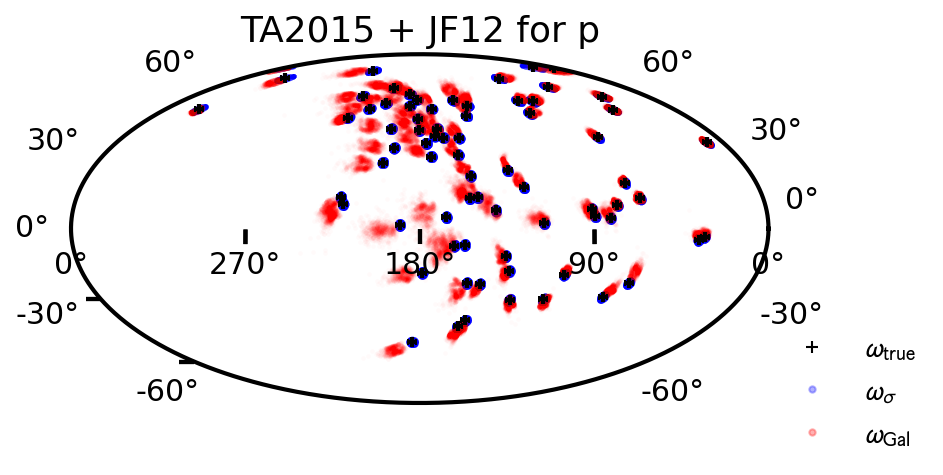

In [7]:

for dt in detectors:
    # if dt != "TA2015":
    #     continue
    for mf in gmfs:
        # fig, axes = plt.subplots(
        #     3, 2, figsize=(12, 10), subplot_kw={"projection": "mollweide"}
        # )
        for ip, pt in enumerate(ptypes):
            # ax = axes.flatten()[ip]

            (
                kappa_gmf,
                omega_gal,
                omega_rand,
                omega_true,
                kappa_gmf_rand,
                cos_thetas,
                time_delays,
            ) = pickle.load(open(file_templ.format(dt, mf, pt), "rb"))
            (defl_lons, defl_lats) = omega_gal[..., 0], omega_gal[..., 1]
            (rand_lons, rand_lats) = omega_rand[..., 0], omega_rand[..., 1]
            (uhecr_lons, uhecr_lats) = omega_true[..., 0], omega_true[..., 1]
            plt.figure(figsize=(6,4))
            skymap = AllSkyMap(lon_0=180)
            skymap.fig.set_size_inches(6, 4)

            # defl_degrees = np.abs(np.rad2deg(np.arccos(cos_thetas)))
            # min_degrees = np.min(defl_degrees, axis=1)
            rgba_color = np.zeros((omega_gal.shape[0],omega_gal.shape[1], 4))
            # alphas = (180 - np.abs(defl_degrees[i, :]))
            # alphas = alphas * 0.05 / max(alphas)
            alphas = np.abs(kappa_gmf_rand[:,:]/np.max(np.abs(kappa_gmf_rand[:,:]), axis=0))
            rgba_color[..., 0] = 1.0
            # the fourth column needs to be your alphas
            rgba_color[..., 3] = alphas

            skymap.scatter(
                np.rad2deg(omega_rand[:, :, 0]),
                np.rad2deg(omega_rand[:, :, 1]),
                color="b",
                alpha=0.02,
                s=5.0,
                lw=0,
            )
            skymap.scatter(
                np.rad2deg(omega_gal[:, :, 0]),
                np.rad2deg(omega_gal[:, :, 1]),
                color='r',#rgba_color,
                alpha=0.02,
                # c=rgba_color,
                s=5.0,
                lw=0,
            )
            skymap.scatter(
                np.rad2deg(omega_true[:, 0]),
                np.rad2deg(omega_true[:, 1]),
                color="k",
                alpha=1,
                marker="+",
                s=20.0,
            )
            # skymap.scatter(180. - 177.14668051, 49.59823616, color="g", marker="o", s=200)
            # skymap.scatter(180. - uhecr_coord.galactic.l.deg, uhecr_coord.galactic.b.deg, color="purple", alpha=1, marker="+", s=50.0)

            handles = [mlines.Line2D([], [], color='k', marker='+', lw=0,
                                    markersize=6, alpha=1, label=r"$\omega_{\rm true}$"),
                    mlines.Line2D([], [], color='b', marker='o', lw=0,
                                    markersize=3, alpha=0.3, label=r"$\omega_{\sigma}$"),
                        mlines.Line2D([], [], color='r', marker='o', lw=0,
                                    markersize=3, alpha=0.3, label=r"$\omega_{\rm Gal}$")]

            skymap.ax.legend(handles=handles, bbox_to_anchor=(1.25, 0.27), fontsize=14)
            skymap.ax.set_title(f"{dt} + {mf} for {pt}")
            skymap.fig.savefig(f'figures/deflections_{dt}_{mf}_{pt}.png', dpi=200)

            defl_degrees = np.abs(np.rad2deg(np.arccos(cos_thetas)))
            min_degrees = np.min(defl_degrees, axis=1)

            # break
